What if your data is actually more complex than a simple straight line?Surprisingly you can actually use a linear model to fit non-linear data.A simple way to do this is to aadd powers of each feature as new features,then train a linear model on this extended  set of features.This technique is called "Polynomial Regression"

In [1]:
#Let's look at the following example
import numpy as np
m = 100
X= 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

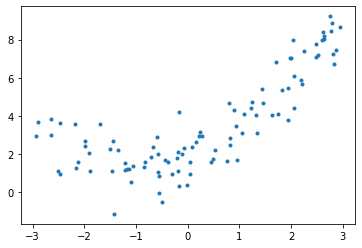

In [3]:
import matplotlib.pyplot as plt
plt.plot(X,y,'.')

Clearly,a st.line will never fit this data properly,so let's use Scikit-learn's PolynomialFeatures class to transform our training data by adding the square(2nd-degree polynomial) of each feature in the training set as new feature

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)

In [5]:
X_poly = poly_features.fit_transform(X)

In [6]:
X[0]

array([2.76433839])

In [7]:
X_poly[0]

array([2.76433839, 7.64156674])

X_poly contains the original feature of X plus the square of this feature,now we can fit a LinearRegression model to this extended training data

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [9]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.90253462]), array([[0.95920836, 0.48562486]]))

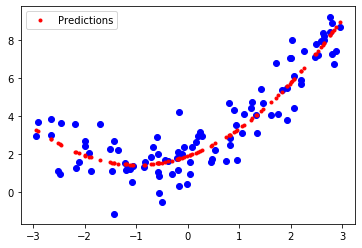

In [10]:
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)),'.',color = 'r',label = 'Predictions')
plt.legend()

In [20]:
#Now lets check for the following dataset
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Importing the dataset 
datas = pd.read_csv("C:\\Users\\Administrator\\Desktop\\data.csv") 
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


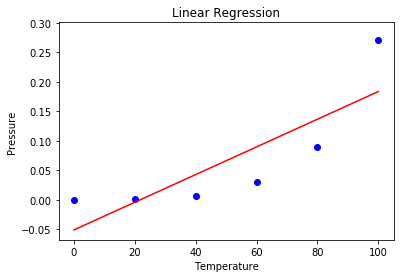

In [21]:
#Divide dataset into two components that is X and y.X will contain the Column between 1 and 2. y will contain the 2 column
X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
lin.fit(X, y)
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X)  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show() 

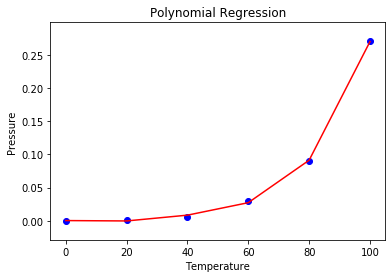

In [22]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show()

In [24]:
# Predicting a new result with Linear Regression 
lin.predict([[110.0]])

array([0.20675333])

In [25]:
# Predicting a new result with Polynomial Regression 
lin2.predict(poly.fit_transform([[110.0]]))

array([0.43295877])

Polynomial basically fits wide range of curvature.
Polynomial provides the best approximation of the relationship between dependent and independent variable.